<a href="https://colab.research.google.com/github/maryem-ahmed/Code_Alpha_UnemploymentAnalysiswithPython/blob/master/Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [ ]:
df = pd.read_csv('/content/Unemployment in India.csv')
print(df.head())


           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
df['Date'].str.strip()

,Date
0,31-05-2019
1,30-06-2019
2,31-07-2019
3,31-08-2019
4,30-09-2019
...,...
763,NaN
764,NaN
765,NaN
766,NaN


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

In [ ]:
df['Date']

,Date
0,2019-05-31
1,2019-06-30
2,2019-07-31
3,2019-08-31
4,2019-09-30
...,...
763,NaT
764,NaT
765,NaT
766,NaT


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [ ]:
df['Date']

,Date
0,2019-05-31
1,2019-06-30
2,2019-07-31
3,2019-08-31
4,2019-09-30
...,...
763,NaT
764,NaT
765,NaT
766,NaT


In [ ]:
numeric_cols = ['Estimated Unemployment Rate (%)', 'Estimated Employed',
                'Estimated Labour Participation Rate (%)']

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')



In [ ]:
#Remove rows with missing critical data
initial_rows = len(df)
df = df.dropna(subset=['Date', 'Estimated Unemployment Rate (%)'])

In [ ]:
# Remove duplicate rows
initial_rows = len(df)
df = df.drop_duplicates()

In [ ]:
print(f"Final dataset shape: {df.shape}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Unique regions: {df['Region'].nunique()}")
print(f"Areas: {df['Area'].unique()}")

Final dataset shape: (740, 7)
Date range: 2019-05-31 00:00:00 to 2020-06-30 00:00:00
Unique regions: 28
Areas: ['Rural' 'Urban']


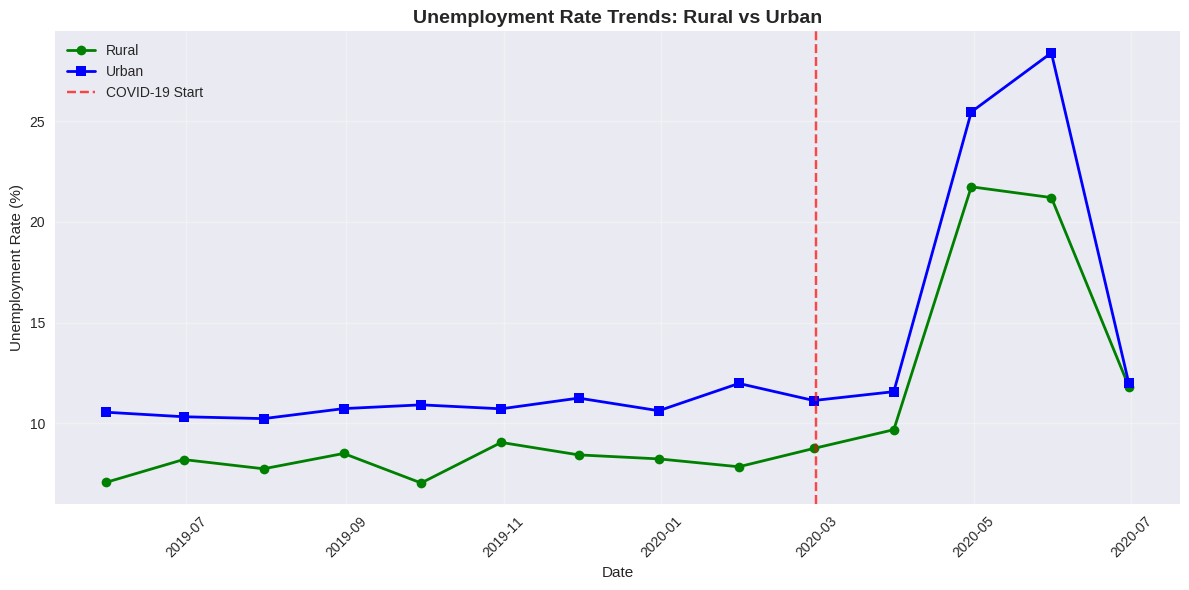

In [ ]:
# Overall Unemployment Trends Over Time
plt.figure(figsize=(12, 6))

df_monthly = df.groupby(['Date', 'Area'])['Estimated Unemployment Rate (%)'].mean().reset_index()
pivot_monthly = df_monthly.pivot(index='Date', columns='Area', values='Estimated Unemployment Rate (%)')

plt.plot(pivot_monthly.index, pivot_monthly['Rural'], marker='o', linewidth=2, label='Rural', color='green')
plt.plot(pivot_monthly.index, pivot_monthly['Urban'], marker='s', linewidth=2, label='Urban', color='blue')
plt.axvline(x=pd.to_datetime('2020-03-01'), color='red', linestyle='--', alpha=0.7, label='COVID-19 Start')

plt.title('Unemployment Rate Trends: Rural vs Urban', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

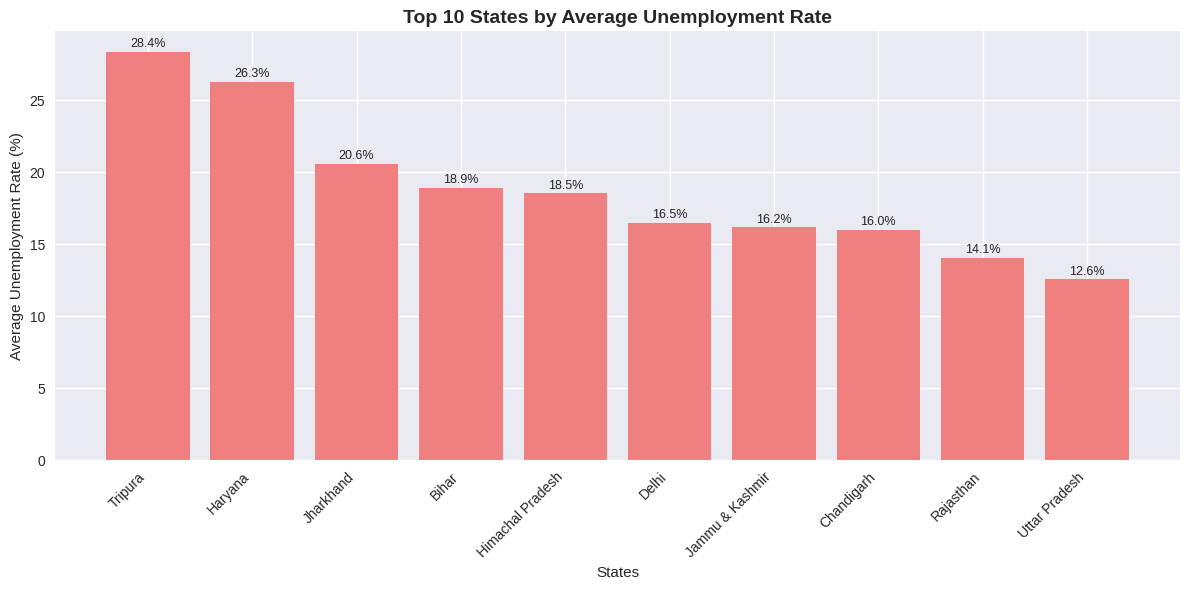

In [ ]:
# Top 10 states with highest unemployment
plt.figure(figsize=(12, 6))

state_avg = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(10)
bars = plt.bar(range(len(state_avg)), state_avg.values, color='lightcoral')

plt.title('Top 10 States by Average Unemployment Rate', fontsize=14, fontweight='bold')
plt.xlabel('States')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(range(len(state_avg)), state_avg.index, rotation=45, ha='right')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

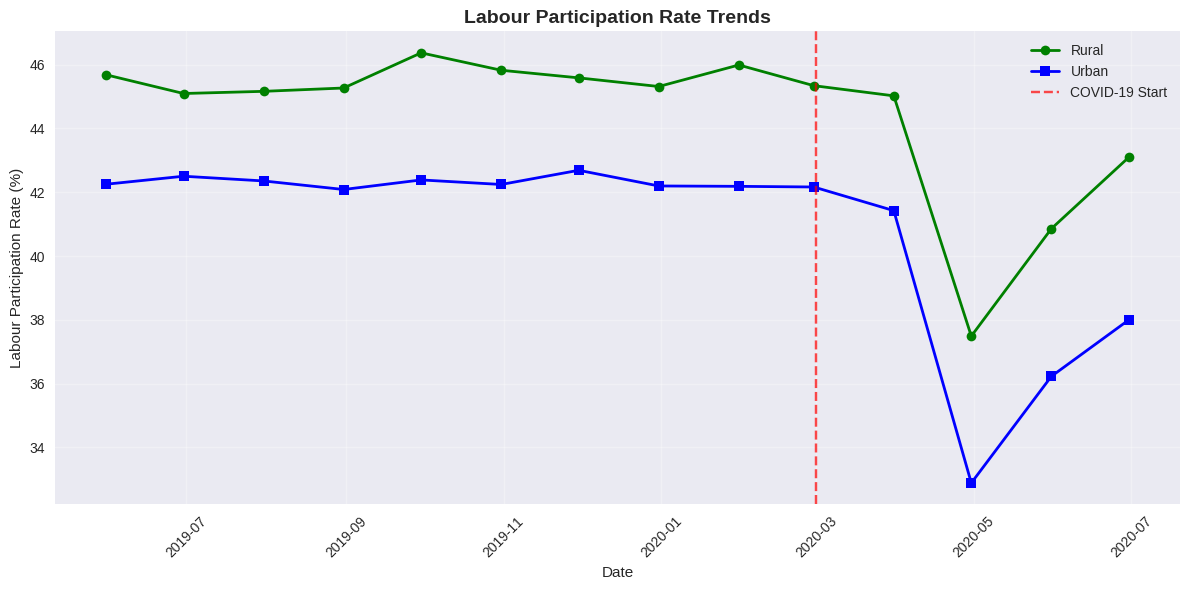

In [ ]:
#Labour Participation Rate Analysis
plt.figure(figsize=(12, 6))

participation_monthly = df.groupby(['Date', 'Area'])['Estimated Labour Participation Rate (%)'].mean().reset_index()
participation_pivot = participation_monthly.pivot(index='Date', columns='Area',
                                                values='Estimated Labour Participation Rate (%)')

plt.plot(participation_pivot.index, participation_pivot['Rural'],
         marker='o', linewidth=2, label='Rural', color='green')
plt.plot(participation_pivot.index, participation_pivot['Urban'],
         marker='s', linewidth=2, label='Urban', color='blue')
plt.axvline(x=pd.to_datetime('2020-03-01'), color='red', linestyle='--', alpha=0.7, label='COVID-19 Start')

plt.title('Labour Participation Rate Trends', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Labour Participation Rate (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Analyze unemployment before, during, and after initial lockdown
periods = {
    'Pre-COVID (2019-2020 Jan-Feb)': df[df['Date'] < '2020-03-01'],
    'COVID Peak (Apr-May 2020)': df[(df['Date'] >= '2020-04-01') & (df['Date'] <= '2020-05-31')],
    'Recovery (Jun 2020)': df[df['Date'] >= '2020-06-01']
}

In [ ]:
period_stats = {}
for period_name, period_data in periods.items():
    if not period_data.empty:
        stats = {
            'Mean Unemployment': period_data['Estimated Unemployment Rate (%)'].mean(),
            'Median Unemployment': period_data['Estimated Unemployment Rate (%)'].median(),
            'Max Unemployment': period_data['Estimated Unemployment Rate (%)'].max(),
            'Rural Mean': period_data[period_data['Area'] == 'Rural']['Estimated Unemployment Rate (%)'].mean(),
            'Urban Mean': period_data[period_data['Area'] == 'Urban']['Estimated Unemployment Rate (%)'].mean()
        }
        period_stats[period_name] = stats


In [ ]:
period_stats

{'Pre-COVID (2019-2020 Jan-Feb)': {'Mean Unemployment': np.float64(9.509533582089553),
  'Median Unemployment': 7.115,
  'Max Unemployment': 34.69,
  'Rural Mean': np.float64(8.094807692307693),
  'Urban Mean': np.float64(10.842246376811595)},
 'COVID Peak (Apr-May 2020)': {'Mean Unemployment': np.float64(24.258431372549015),
  'Median Unemployment': 19.96,
  'Max Unemployment': 76.74,
  'Rural Mean': np.float64(21.478399999999997),
  'Urban Mean': np.float64(26.931538461538462)},
 'Recovery (Jun 2020)': {'Mean Unemployment': np.float64(11.9036),
  'Median Unemployment': 10.345,
  'Max Unemployment': 35.57,
  'Rural Mean': np.float64(11.825200000000002),
  'Urban Mean': np.float64(11.982000000000001)}}

Display how COVID impact statistics

In [ ]:
print("COVID-19 Impact Statistics:")
for period, stats in period_stats.items():
    print(f"\n{period}:")
    for stat_name, value in stats.items():
        if pd.notna(value):
            print(f"  {stat_name}: {value:.2f}%")

COVID-19 Impact Statistics:

Pre-COVID (2019-2020 Jan-Feb):
  Mean Unemployment: 9.51%
  Median Unemployment: 7.12%
  Max Unemployment: 34.69%
  Rural Mean: 8.09%
  Urban Mean: 10.84%

COVID Peak (Apr-May 2020):
  Mean Unemployment: 24.26%
  Median Unemployment: 19.96%
  Max Unemployment: 76.74%
  Rural Mean: 21.48%
  Urban Mean: 26.93%

Recovery (Jun 2020):
  Mean Unemployment: 11.90%
  Median Unemployment: 10.35%
  Max Unemployment: 35.57%
  Rural Mean: 11.83%
  Urban Mean: 11.98%


In [ ]:
# Create COVID impact visualization
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

In [ ]:
covid_analysis = df[df['Date'] >= '2020-01-01'].copy()
covid_analysis['Period'] = covid_analysis['Date'].apply(
    lambda x: 'Jan-Mar 2020' if x < pd.to_datetime('2020-04-01')
    else 'Apr-May 2020' if x < pd.to_datetime('2020-06-01')
    else 'Jun 2020+'
)

In [ ]:
heatmap_data = covid_analysis.groupby(['Region', 'Period'])['Estimated Unemployment Rate (%)'].mean().unstack()
heatmap_data = heatmap_data.fillna(0)

Text(70.72222222222221, 0.5, 'States')

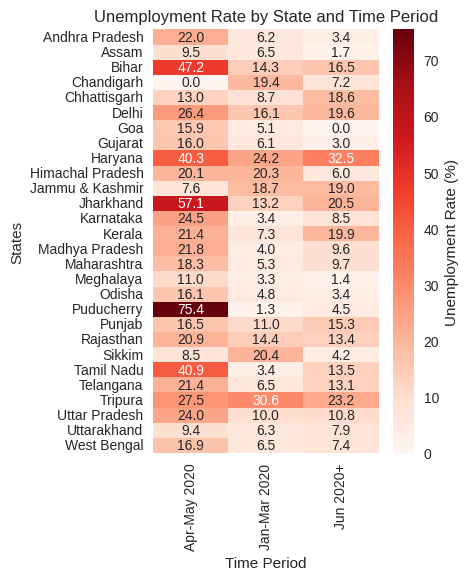

In [ ]:
plt.subplot(1, 2, 1)
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='Reds', cbar_kws={'label': 'Unemployment Rate (%)'})
plt.title('Unemployment Rate by State and Time Period')
plt.xlabel('Time Period')
plt.ylabel('States')

Seasonal Analysis

In [ ]:
# Extract month and year for seasonal analysis
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Month_Name'] = df['Date'].dt.strftime('%b')
pre_covid_seasonal = df[df['Date'] < '2020-03-01'].copy()

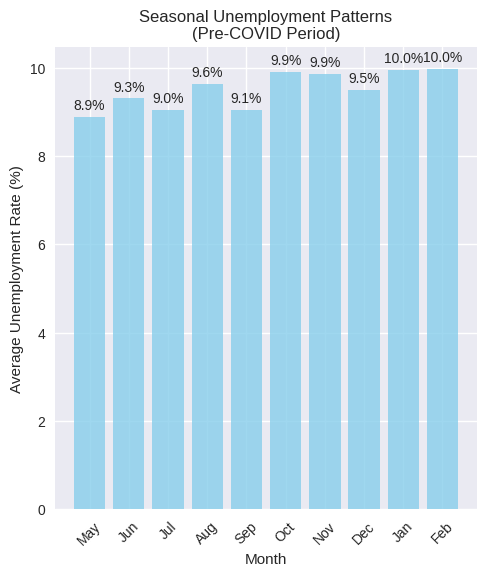

In [ ]:
if not pre_covid_seasonal.empty:
    seasonal_pattern = pre_covid_seasonal.groupby('Month_Name')['Estimated Unemployment Rate (%)'].mean()
    month_order = ['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb']
    seasonal_pattern = seasonal_pattern.reindex([m for m in month_order if m in seasonal_pattern.index])

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    bars = plt.bar(seasonal_pattern.index, seasonal_pattern.values, color='skyblue', alpha=0.8)
    plt.title('Seasonal Unemployment Patterns\n(Pre-COVID Period)')
    plt.xlabel('Month')
    plt.ylabel('Average Unemployment Rate (%)')
    plt.xticks(rotation=45)

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{height:.1f}%', ha='center', va='bottom')

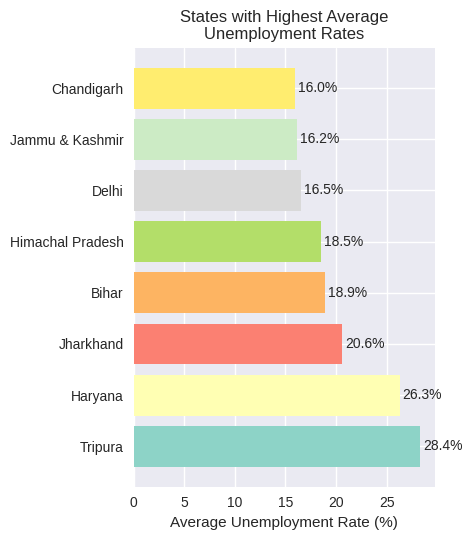

In [ ]:
# Regional comparison
top_states = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().nlargest(8)

plt.subplot(1, 2, 2)
colors = plt.cm.Set3(np.linspace(0, 1, len(top_states)))
bars = plt.barh(range(len(top_states)), top_states.values, color=colors)
plt.title('States with Highest Average\nUnemployment Rates')
plt.xlabel('Average Unemployment Rate (%)')
plt.yticks(range(len(top_states)), top_states.index)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.3, bar.get_y() + bar.get_height()/2.,
            f'{width:.1f}%', ha='left', va='center')

plt.tight_layout()
plt.show()

**Key Insights** and **Findings**

In [ ]:
# The variation Between Rural and Urban Analysis
overall_mean = df['Estimated Unemployment Rate (%)'].mean()
rural_mean = df[df['Area'] == 'Rural']['Estimated Unemployment Rate (%)'].mean()
urban_mean = df[df['Area'] == 'Urban']['Estimated Unemployment Rate (%)'].mean()
pre_covid_mean = df[df['Date'] < '2020-03-01']['Estimated Unemployment Rate (%)'].mean()
covid_peak_mean = df[(df['Date'] >= '2020-04-01') & (df['Date'] <= '2020-05-31')]['Estimated Unemployment Rate (%)'].mean()
highest_unemployment_state = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().idxmax()
lowest_unemployment_state = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().idxmin()

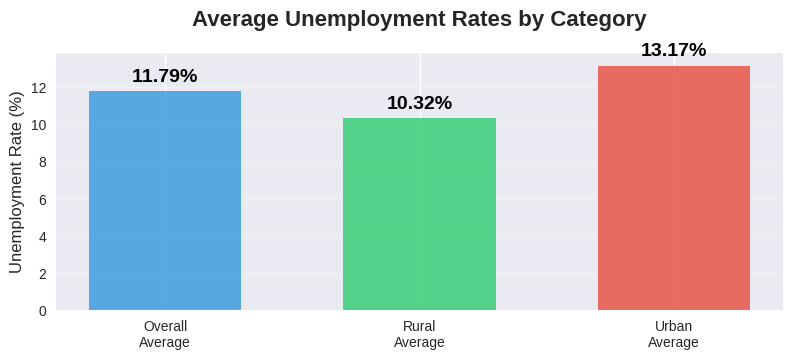

In [ ]:
# 1. Overall Summary - Gauge-style visualization
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)
colors = {
    'overall': '#3498db',
    'rural': '#2ecc71',
    'urban': '#e74c3c',
    'pre_covid': '#27ae60',
    'covid_peak': '#e74c3c',
    'impact': '#f39c12'
}

ax1 = fig.add_subplot(gs[0, :2])
categories = ['Overall\nAverage', 'Rural\nAverage', 'Urban\nAverage']
values = [overall_mean, rural_mean, urban_mean]
bar_colors = [colors['overall'], colors['rural'], colors['urban']]

bars = ax1.bar(categories, values, color=bar_colors, alpha=0.8, width=0.6)
ax1.set_title('Average Unemployment Rates by Category', fontsize=16, fontweight='bold', pad=20)
ax1.set_ylabel('Unemployment Rate (%)', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, values)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'{value:.2f}%', ha='center', va='bottom',
            fontsize=14, fontweight='bold', color='black')

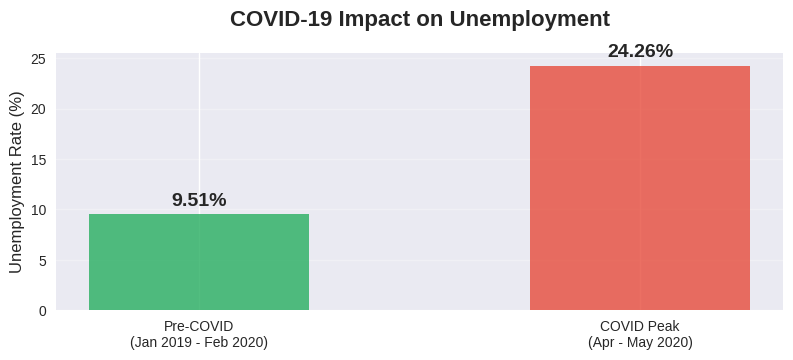

In [ ]:
# 2. COVID Impact Comparison - Before/After
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)
colors = {
    'overall': '#3498db',
    'rural': '#2ecc71',
    'urban': '#e74c3c',
    'pre_covid': '#27ae60',
    'covid_peak': '#e74c3c',
    'impact': '#f39c12'
}

ax2 = fig.add_subplot(gs[0, 2:])
covid_categories = ['Pre-COVID\n(Jan 2019 - Feb 2020)', 'COVID Peak\n(Apr - May 2020)']
covid_values = [pre_covid_mean, covid_peak_mean]
covid_colors = [colors['pre_covid'], colors['covid_peak']]

bars = ax2.bar(covid_categories, covid_values, color=covid_colors, alpha=0.8, width=0.5)
ax2.set_title('COVID-19 Impact on Unemployment', fontsize=16, fontweight='bold', pad=20)
ax2.set_ylabel('Unemployment Rate (%)', fontsize=12)
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for bar, value in zip(bars, covid_values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{value:.2f}%', ha='center', va='bottom',
            fontsize=14, fontweight='bold')

Text(0.98, 0.02, 'Gap: 2.84 percentage points\n(Urban is higher)')

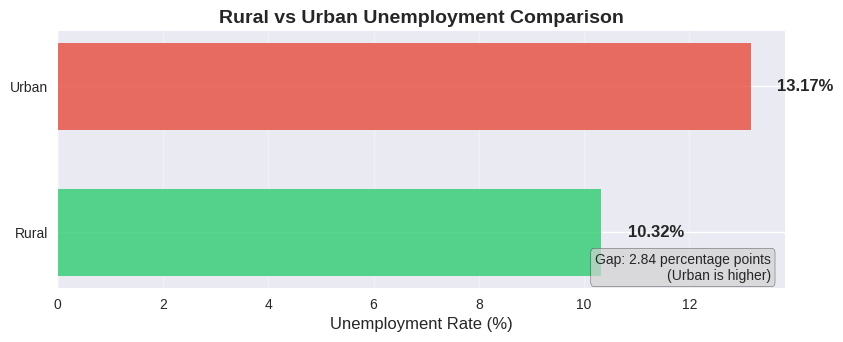

In [ ]:
# 3. Detailed Rural vs Urban Comparison
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)
colors = {
    'overall': '#3498db',
    'rural': '#2ecc71',
    'urban': '#e74c3c',
    'pre_covid': '#27ae60',
    'covid_peak': '#e74c3c',
    'impact': '#f39c12'
}

ax3 = fig.add_subplot(gs[1, :2])
comparison_data = {
    'Rural': rural_mean,
    'Urban': urban_mean,
    'Difference': abs(rural_mean - urban_mean)
}
# Create horizontal bar chart
y_pos = np.arange(len(['Rural', 'Urban']))
values_comp = [rural_mean, urban_mean]
colors_comp = [colors['rural'], colors['urban']]

bars = ax3.barh(y_pos, values_comp, color=colors_comp, alpha=0.8, height=0.6)
ax3.set_yticks(y_pos)
ax3.set_yticklabels(['Rural', 'Urban'])
ax3.set_xlabel('Unemployment Rate (%)', fontsize=12)
ax3.set_title('Rural vs Urban Unemployment Comparison', fontsize=14, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, values_comp)):
    width = bar.get_width()
    ax3.text(width + 0.5, bar.get_y() + bar.get_height()/2.,
            f'{value:.2f}%', ha='left', va='center',
            fontsize=12, fontweight='bold')
# Add difference annotation
diff_value = abs(rural_mean - urban_mean)
higher_area = 'Rural' if rural_mean > urban_mean else 'Urban'
ax3.text(0.98, 0.02, f'Gap: {diff_value:.2f} percentage points\n({higher_area} is higher)',
         transform=ax3.transAxes, ha='right', va='bottom',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.7),
         fontsize=10)

Text(0, 30, 'Current:\n14.7%')

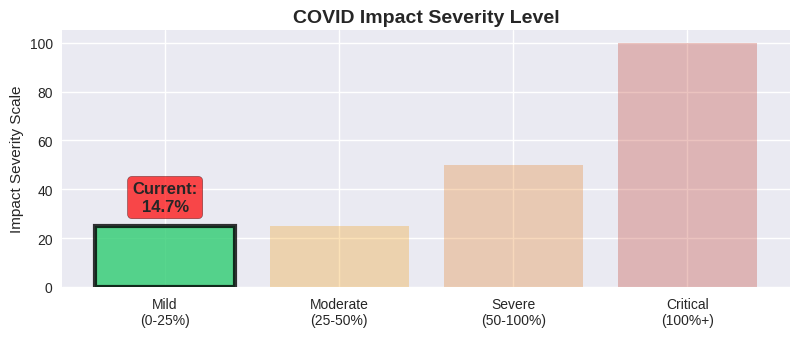

In [ ]:
# 4. COVID Impact Severity Gauge
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)
colors = {
    'overall': '#3498db',
    'rural': '#2ecc71',
    'urban': '#e74c3c',
    'pre_covid': '#27ae60',
    'covid_peak': '#e74c3c',
    'impact': '#f39c12'
}

ax4 = fig.add_subplot(gs[1, 2:])
impact_levels = ['Mild\n(0-25%)', 'Moderate\n(25-50%)', 'Severe\n(50-100%)', 'Critical\n(100%+)']
impact_thresholds = [25, 50, 100, float('inf')]
impact_colors_gauge = ['#2ecc71', '#f39c12', '#e67e22', '#c0392b']
covid_impact_pct = covid_peak_mean - pre_covid_mean
# Determine impact level
current_impact_level = 0
for i, threshold in enumerate(impact_thresholds):
    if covid_impact_pct <= threshold:
        current_impact_level = i
        break

# Create gauge visualization
bars = ax4.bar(range(len(impact_levels)), [25, 25, 50, 100],
              color=impact_colors_gauge, alpha=0.3, width=0.8)

# Highlight current impact level
bars[current_impact_level].set_alpha(0.8)
bars[current_impact_level].set_edgecolor('black')
bars[current_impact_level].set_linewidth(3)

ax4.set_xticks(range(len(impact_levels)))
ax4.set_xticklabels(impact_levels, rotation=0)
ax4.set_ylabel('Impact Severity Scale')
ax4.set_title('COVID Impact Severity Level', fontsize=14, fontweight='bold')

# Add current impact indicator
ax4.text(current_impact_level, bars[current_impact_level].get_height() + 5,
         f'Current:\n{covid_impact_pct:.1f}%', ha='center', va='bottom',
         fontsize=12, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='red', alpha=0.7))



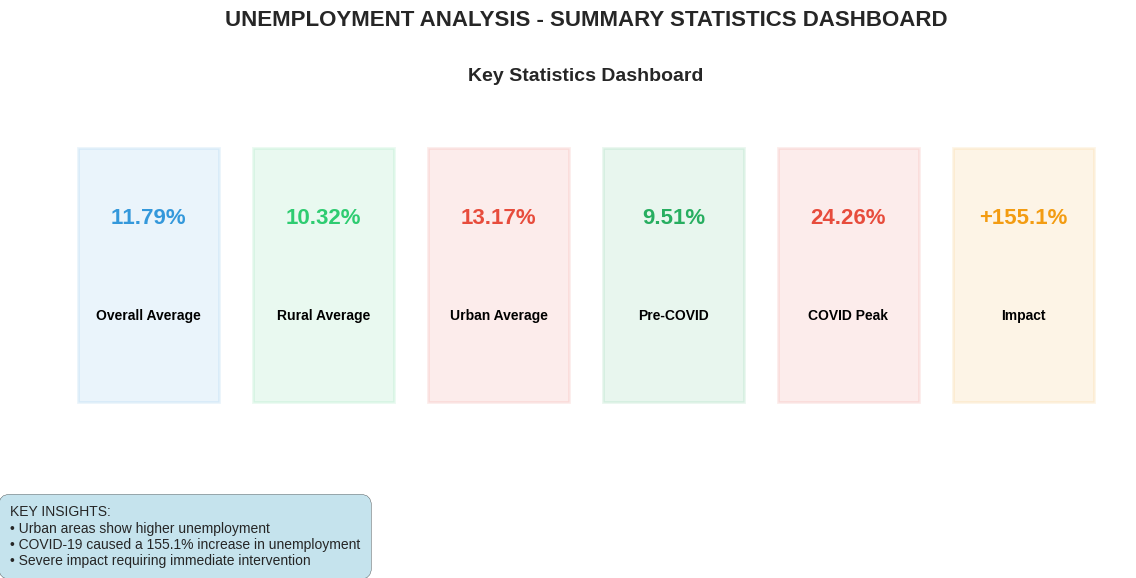

In [ ]:

# Create figure with minimal spacing - single row layout
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 1, top=0.85, bottom=0.20, left=0.05, right=0.95)

colors = {
    'overall': '#3498db',
    'rural': '#2ecc71',
    'urban': '#e74c3c',
    'pre_covid': '#27ae60',
    'covid_peak': '#e74c3c',
    'impact': '#f39c12'
}
# Key Statistics Dashboard - using the single subplot
ax5 = fig.add_subplot(gs[0, 0])
ax5.axis('off')

stats_data = [
    ('Overall Average', f'{overall_mean:.2f}%', colors['overall']),
    ('Rural Average', f'{rural_mean:.2f}%', colors['rural']),
    ('Urban Average', f'{urban_mean:.2f}%', colors['urban']),
    ('Pre-COVID', f'{pre_covid_mean:.2f}%', colors['pre_covid']),
    ('COVID Peak', f'{covid_peak_mean:.2f}%', colors['covid_peak']),
    ('Impact', f'+{covid_impact_pct:.1f}%', colors['impact'])
]

# Create cards with better spacing
card_width = 0.13
card_height = 0.65
x_positions = np.linspace(0.03, 0.84, len(stats_data))

for i, (label, value, color) in enumerate(stats_data):
    # Card background
    rect = Rectangle((x_positions[i], 0.15), card_width, card_height,
                    facecolor=color, alpha=0.1, edgecolor=color, linewidth=2)
    ax5.add_patch(rect)

    # Value (large text) - adjusted position
    ax5.text(x_positions[i] + card_width/2, 0.62, value,
            ha='center', va='center', fontsize=16, fontweight='bold', color=color)

    # Label (smaller text) - adjusted position and wrapping
    label_lines = label.split(' ')
    if len(label_lines) > 2:
        # Split long labels into multiple lines
        line1 = ' '.join(label_lines[:2])
        line2 = ' '.join(label_lines[2:])
        ax5.text(x_positions[i] + card_width/2, 0.42, line1,
                ha='center', va='center', fontsize=9, fontweight='bold', color='black')
        ax5.text(x_positions[i] + card_width/2, 0.32, line2,
                ha='center', va='center', fontsize=9, fontweight='bold', color='black')
    else:
        ax5.text(x_positions[i] + card_width/2, 0.37, label,
                ha='center', va='center', fontsize=10, fontweight='bold', color='black')

ax5.set_xlim(0, 1)
ax5.set_ylim(0, 1)
ax5.set_title('Key Statistics Dashboard', fontsize=14, fontweight='bold', y=0.95)

# Add main title with better positioning
fig.suptitle('UNEMPLOYMENT ANALYSIS - SUMMARY STATISTICS DASHBOARD',
            fontsize=16, fontweight='bold', y=0.95)

# Add insights text box with better positioning
insights_text = f"""KEY INSIGHTS:
• {"Rural areas show higher unemployment" if rural_mean > urban_mean else "Urban areas show higher unemployment"}
• COVID-19 caused a {covid_impact_pct:.1f}% increase in unemployment
• {"Severe impact requiring immediate intervention" if covid_impact_pct > 50 else "Moderate impact with recovery potential"}"""

fig.text(0.02, 0.02, insights_text, fontsize=10,
         bbox=dict(boxstyle="round,pad=0.8", facecolor='lightblue', alpha=0.7),
         verticalalignment='bottom', horizontalalignment='left')

plt.tight_layout()
plt.show()

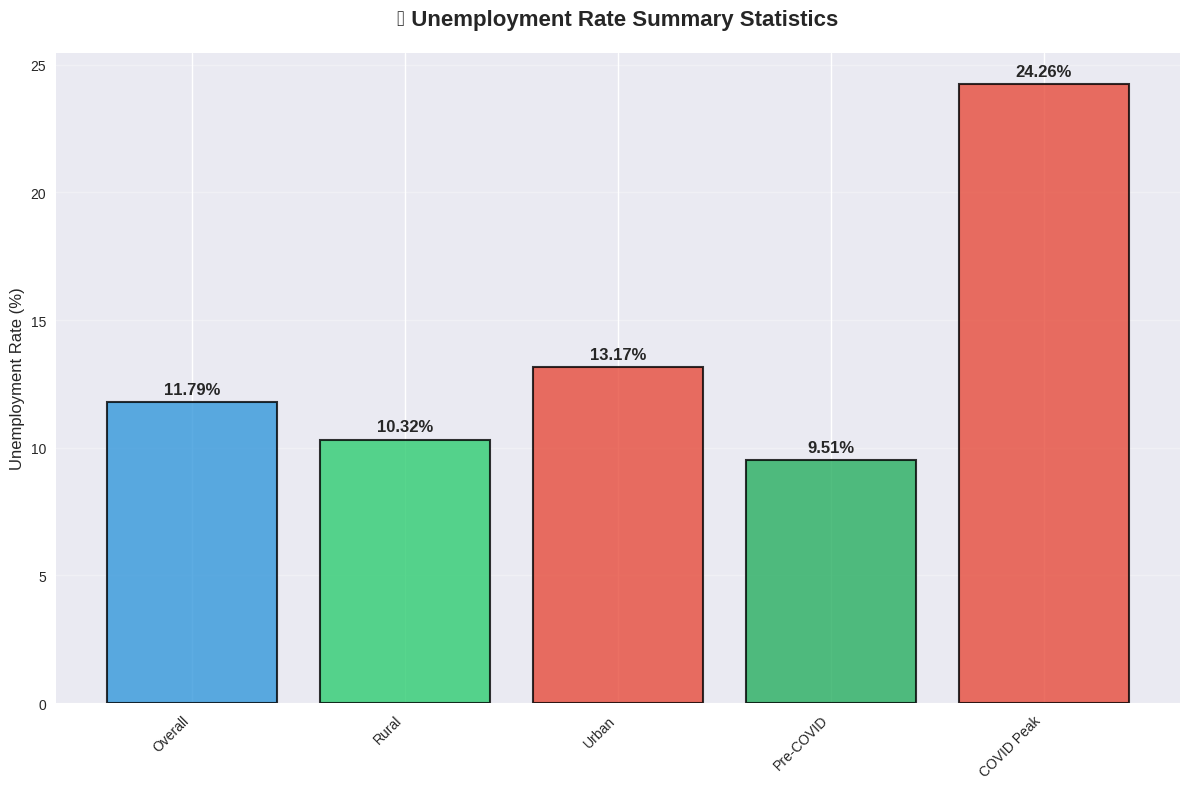

✨ Summary statistics have been visualized!
📊 Created comprehensive dashboard with 6 key metrics


In [ ]:
plt.figure(figsize=(12, 8))
all_stats = ['Overall', 'Rural', 'Urban', 'Pre-COVID', 'COVID Peak']
all_values = [overall_mean, rural_mean, urban_mean, pre_covid_mean, covid_peak_mean]
all_colors = [colors['overall'], colors['rural'], colors['urban'], colors['pre_covid'], colors['covid_peak']]

bars = plt.bar(all_stats, all_values, color=all_colors, alpha=0.8, edgecolor='black', linewidth=1.5)
plt.title('📊 Unemployment Rate Summary Statistics', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add value labels
for bar, value in zip(bars, all_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.2,
            f'{value:.2f}%', ha='center', va='bottom',
            fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("✨ Summary statistics have been visualized!")
print(f"📊 Created comprehensive dashboard with {len(stats_data)} key metrics")